## **EVALUACIÓN MODELOS**
El dataset utilizado no contiene una gran cantidad de datos ya que se realizar exclusivamente de la zona de Churriana, Málaga y además nuestro modelo de scrapeo web termina bloqueando la extracción de datos y no nos permite obtener todos los datos de la zona disponibles.

Se aplican diferentes modelos para ver cual de ellos presenta el mejor comportamiento a la hora de predecir el precio:
* Regresión Lineal
* Regresión Bridge
* SVM-Support Vector Machine
* XgBoost Regresion
* Gradient Boosting Regressor
* Arbol de Regresión

### **Importamos las librerías necesarias:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

### **Importamos el modulo con las funciones para el calculo de modelos**

In [2]:
from ipynb.fs.defs.Funciones_modelos_ML import regresion_lineal,regresion_ridge, svm_support, xgboost_regresion, gb_regresion, arbol_regresion

In [3]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data = pd.read_csv(file_path, index_col = 0)

In [4]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


#### **Tabla para evaluación de los modelos**<br>
Creamos una tabla vacía con las siguientes columnas: 'Modelo', 'Detalles', 'R2 train', 'R2 test', 'MAE train' y 'MAE test'.
Aquí iremos agregando los resultados de cada modelo para finalmente de un simple vistazo poder comparar los rendimientos que aportan y quedarnos con uno de ellos.

In [5]:
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

Definimos dos funciones que nos ayudarán a evaluar posteriormente el rendimiento de los modelos.

#### **Variable objetivo y features**

In [6]:
%store -r features
%store -r target

#### **Dividimos el conjunto de datos en train y test**

In [7]:
%store -r features_train1
%store -r features_test1
%store -r target_train1
%store -r target_test1

#### **Regresión lineal**

In [8]:
features_train= features_train1
features_test = features_test1
target_train= target_train1
target_test= target_test1

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#Definimos una función para aplicar regresiones lineales. 

r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_lineal(data, target, features_train, target_train, features_test, target_test)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7968,0.7097,59748.341766,72635.246482


### **Regresión Ridge**

In [11]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = regresion_ridge(data, target, features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Bridge','Sin procesar/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7968,0.7097,59748.341766,72635.246482
1,Regresión Bridge,Sin procesar/Sin outliers,0.7589,0.6166,66154.779450,90640.081427


El modelo de regresión lineal presenta mejores resultados que el modelo bridge.
<br>
Veamos otros tipos de modelos a comparar.

### **SVM-Support Vector Machine**


In [12]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = svm_support(data, target, features_train, target_train, features_test, target_test, kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = [f"SVM {kernel}","Sin procesar/Sin outliers",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7968,0.7097,59748.341766,72635.246482
1,Regresión Bridge,Sin procesar/Sin outliers,0.7589,0.6166,66154.779450,90640.081427
2,SVM linear,Sin procesar/Sin outliers,0.6899,0.5765,71564.130606,91359.905767
3,SVM poly,Sin procesar/Sin outliers,-0.0879,-0.1417,133037.979209,138241.086612
4,SVM rbf,Sin procesar/Sin outliers,-0.0959,-0.1460,133405.157270,138460.576667
5,SVM sigmoid,Sin procesar/Sin outliers,-0.0960,-0.1462,133416.996507,138470.997963


Este modelo presenta los mejores resultados para el parámetro "linear", el resto no ajusta bien el modelo.

### **XGBoost**

In [13]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = xgboost_regresion(data, target, features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['xgboost Regresion','Sin procesar/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7968,0.7097,59748.341766,72635.246482
1,Regresión Bridge,Sin procesar/Sin outliers,0.7589,0.6166,66154.779450,90640.081427
2,SVM linear,Sin procesar/Sin outliers,0.6899,0.5765,71564.130606,91359.905767
3,SVM poly,Sin procesar/Sin outliers,-0.0879,-0.1417,133037.979209,138241.086612
4,SVM rbf,Sin procesar/Sin outliers,-0.0959,-0.1460,133405.157270,138460.576667
5,SVM sigmoid,Sin procesar/Sin outliers,-0.0960,-0.1462,133416.996507,138470.997963
6,xgboost Regresion,Sin procesar/Sin outliers,1.0000,0.6653,264.895824,60078.626379


### **Gradient Boosting Regressor**

In [14]:
r2_train,r2_test,MAE_train,MAE_test,target_train_pred,target_test_pred = gb_regresion(data, target, features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Gradient Boosting Regressor','Sin procesar/Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7968,0.7097,59748.341766,72635.246482
1,Regresión Bridge,Sin procesar/Sin outliers,0.7589,0.6166,66154.779450,90640.081427
2,SVM linear,Sin procesar/Sin outliers,0.6899,0.5765,71564.130606,91359.905767
3,SVM poly,Sin procesar/Sin outliers,-0.0879,-0.1417,133037.979209,138241.086612
4,SVM rbf,Sin procesar/Sin outliers,-0.0959,-0.1460,133405.157270,138460.576667
5,SVM sigmoid,Sin procesar/Sin outliers,-0.0960,-0.1462,133416.996507,138470.997963
6,xgboost Regresion,Sin procesar/Sin outliers,1.0000,0.6653,264.895824,60078.626379
7,Gradient Boosting Regressor,Sin procesar/Sin outliers,0.9939,0.5325,11113.940793,71422.954367


### **Random Forest Regressor**

In [15]:
r2_train,r2_test, MAE_train,MAE_test,target_train_pred,target_test_pred = arbol_regresion(data, target, features_train, target_train, features_test, target_test)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Sin procesar/Sin outliers',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar/Sin outliers,0.7968,0.7097,59748.341766,72635.246482
1,Regresión Bridge,Sin procesar/Sin outliers,0.7589,0.6166,66154.779450,90640.081427
2,SVM linear,Sin procesar/Sin outliers,0.6899,0.5765,71564.130606,91359.905767
3,SVM poly,Sin procesar/Sin outliers,-0.0879,-0.1417,133037.979209,138241.086612
4,SVM rbf,Sin procesar/Sin outliers,-0.0959,-0.1460,133405.157270,138460.576667
5,SVM sigmoid,Sin procesar/Sin outliers,-0.0960,-0.1462,133416.996507,138470.997963
6,xgboost Regresion,Sin procesar/Sin outliers,1.0000,0.6653,264.895824,60078.626379
7,Gradient Boosting Regressor,Sin procesar/Sin outliers,0.9939,0.5325,11113.940793,71422.954367
8,Árbol de regresión,Sin procesar/Sin outliers,0.8045,0.6497,55712.089869,75832.371148


### **Valoración de resultados modelos sin Outliers**

Tras hacer diferentes pruebas de entranamiento el modelo aplicado a datos sin outliers presenta mejores resultados.
<br>
Los modelos que han presentado mejor rendimientos han sido xgboost y gradient boosting regression. En el siguiente nootebook trabajaremos ambos modelos para ver si conseguimos mejorar su rendimiento y quedarnos con el que mejores resultaods aporte para generar nuestro dataset final con la columna precio predicho, variación del precio predicho con el precio real y sacar su porcentaje de rentabilidad. Estos datos serán los que usaremos para la parte de viualización front end.

In [16]:
resultados['R2 test'] = resultados['R2 test'].astype(float)

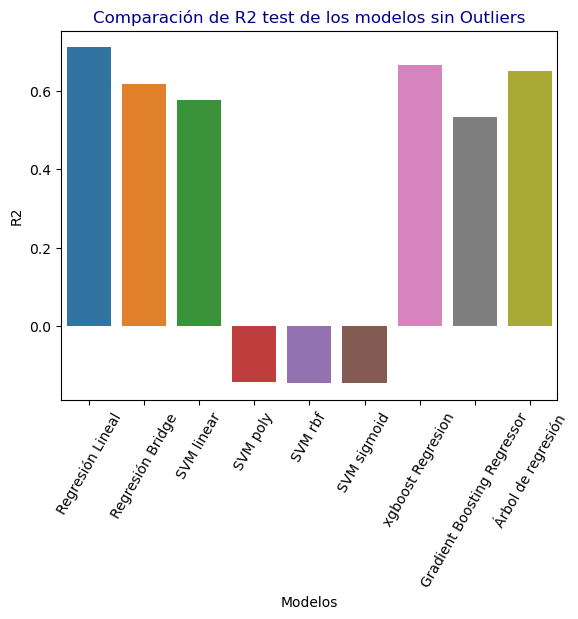

In [17]:
sns.barplot(x='Modelo', y='R2 test', data=resultados)

# Añade título y etiquetas de eje
plt.title('Comparación de R2 test de los modelos sin Outliers', color='darkblue')
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.xticks(rotation=60)

# Muestra el gráfico
plt.savefig("../graficas/comparacion_r2test_modelos_without_outliers")
plt.show()

Guardamos la tabla de evaluaciones obtenida:

In [18]:
resultados.to_csv('../data/tabla_resultados_evaluaciones_modelos_without_outliers.csv', index=False)